In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [2]:
endpoint1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT%20%60month_name%60%2C%20%60month%60%2C%20%60year%60%2C%20%60query_count%60%2C%20%60query_text%60%0AWHERE%20caseless_eq(%60query_text%60%2C%20%22fire%22)%20AND%20(%60year%60%20%3D%202016)'

response1 = requests.get(endpoint1)
response1

<Response [200]>

In [3]:
res1 = response1.json()
firedf = pd.DataFrame(res1)
firedf['query_count'] = firedf['query_count'].astype(int)
firedf = firedf.rename(columns={'query_count': 'count', 'month_name': 'month', 'query_text': 'text'})
firedf = firedf.sort_values(by='count', ascending=False)
firedf = firedf.reset_index(drop=True)
print(firedf.head(1))

    month  year  count  text
0  August  2016     47  fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

In [4]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>=100&$limit=500000'
response2 = requests.get(endpoint2)
response2

<Response [200]>

In [5]:
res2 = response2.json()
res100 = pd.DataFrame(res2)
res100['query_count'] = res100['query_count'].astype(int)
res100 = res100.rename(columns={'month_name': 'month', 'query_text': 'text', 'query_count': 'count', 'month':'month1'})
res100 = res100.drop(columns = ['month1'])
res100 = res100.sort_values(by=['year', 'count'], ascending=[False, False])
res100 = res100.reset_index(drop=True)
res100

,month,year,count,text
0,January,2021,543,covid vaccine
1,January,2021,531,payroll
2,January,2021,334,Vaccine
3,July,2021,326,Payroll
4,January,2021,319,Christmas Tree-cycling
...,...,...,...,...
1282,April,2014,102,police
1283,July,2014,102,media releases
1284,August,2014,102,employment
1285,March,2014,101,permits


In [6]:
res100_total_count = res100['count'].count()
res100_total_count
print(f"The number times a query was run more than 100 times in a month: {res100_total_count}")

The number times a query was run more than 100 times in a month: 1287


3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [7]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT%20%60month_name%60%2C%20%60month%60%2C%20%60year%60%2C%20%60query_count%60%2C%20%60query_text%60%0AWHERE%20(%60query_count%60%20%3E%20100)%20AND%20caseless_eq(%60query_text%60%2C%20%22codes%22)'
response3 = requests.get(endpoint3)
response3

<Response [200]>

In [8]:
res3 = response3.json()
codes = pd.DataFrame(res3)
codes = codes.rename(columns={'month_name': 'month', 'query_text': 'text', 'query_count': 'count', 'month':'month1'})
codes = codes.drop(columns = ['month1'])
codes = codes.sort_values(by=['year', 'count'], ascending=[False, False])
codes

,month,year,count,text
48,January,2021,191,codes
22,June,2021,138,codes
20,March,2021,134,codes
17,February,2021,131,codes
9,May,2021,115,codes
7,July,2021,114,codes
1,April,2021,102,codes
53,June,2020,208,codes
45,May,2020,184,codes
44,April,2020,183,Codes


In [9]:
total_code_searches = codes['count'].count()
total_code_searches
print(f"The number times codes was searched over 100 times in a month: {total_code_searches}")

The number times codes was searched over 100 times in a month: 58


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [10]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=500000'
#https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>=100

response4 = requests.get(endpoint4)
response4

<Response [200]>

In [11]:
res4 = response4.json()
all_data = pd.DataFrame(res4)
all_data

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [12]:
map_data = all_data.loc[all_data['query_text'] == 'maps']
map_data

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


In [13]:
#convert query_count to into
map_data['query_count'] = map_data['query_count'].astype(int)

C:\Users\nelso\AppData\Local\Temp\ipykernel_25352\2819701133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['query_count'] = map_data['query_count'].astype(int)


map_data.info()

In [14]:
map_data['year1'] = pd.to_datetime(map_data['year'])


C:\Users\nelso\AppData\Local\Temp\ipykernel_25352\3147350891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['year1'] = pd.to_datetime(map_data['year'])


In [15]:
map_data['years'] = map_data['year1'].dt.year


C:\Users\nelso\AppData\Local\Temp\ipykernel_25352\1817569378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['years'] = map_data['year1'].dt.year


In [16]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

map_data['month'] = map_data['month_name'].map(months)


C:\Users\nelso\AppData\Local\Temp\ipykernel_25352\2812193912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data['month'] = map_data['month_name'].map(months)


In [17]:
map_data = map_data.drop(columns = ['year', 'year1'])
map_data = map_data.rename(columns = {'years': 'year'})
map_data

,month_name,query_count,query_text,month,year
2,January,97,maps,1,2014
503,February,140,maps,2,2014
1005,March,144,maps,3,2014
1503,April,152,maps,4,2014
2003,May,119,maps,5,2014
...,...,...,...,...,...
39196,November,86,maps,11,2020
39688,December,113,maps,12,2020
41188,March,132,maps,3,2021
41683,April,148,maps,4,2021


In [18]:

map_data['datetime'] = pd.to_datetime(map_data['year'].astype(str) + '-' + map_data['month'].astype(str))
map_data

,month_name,query_count,query_text,month,year,datetime
2,January,97,maps,1,2014,2014-01-01
503,February,140,maps,2,2014,2014-02-01
1005,March,144,maps,3,2014,2014-03-01
1503,April,152,maps,4,2014,2014-04-01
2003,May,119,maps,5,2014,2014-05-01
...,...,...,...,...,...,...
39196,November,86,maps,11,2020,2020-11-01
39688,December,113,maps,12,2020,2020-12-01
41188,March,132,maps,3,2021,2021-03-01
41683,April,148,maps,4,2021,2021-04-01


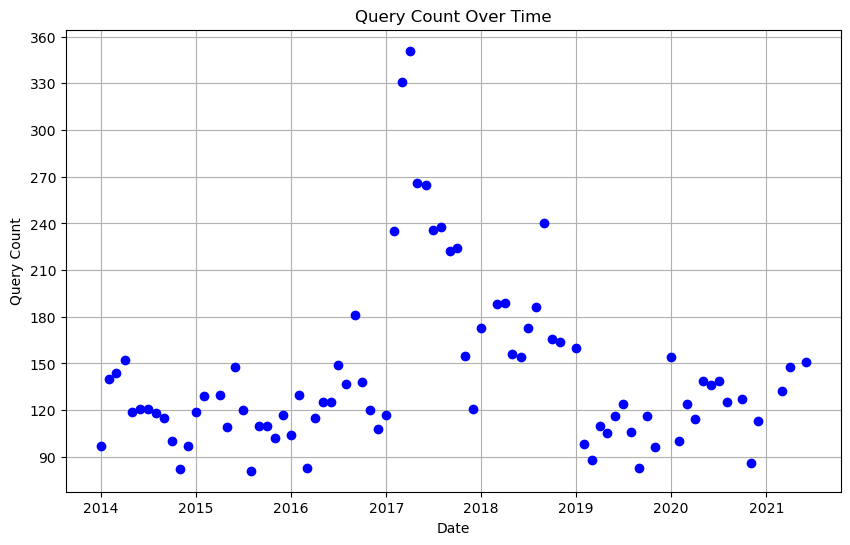

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(map_data['datetime'], map_data['query_count'], marker='o', linestyle='none', color='b')

plt.xlabel('Date')
plt.ylabel('Query Count')
plt.title('Query Count Over Time')
plt.grid(True)


plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=10)) 

5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  

In [20]:
endpoint5 = 'https://data.nashville.gov/resource/7qhx-rexh.json?$limit=5000000'


response5 = requests.get(endpoint5)
response5

<Response [200]>

In [21]:
res5 = response5.json()
res5_all_data = pd.DataFrame(res5)
res5_all_data

,case_number,status,case_request,case_subrequest,additional_subrequest,date_time_opened,date_time_closed,case_origin,state_issue,closed_when_created,...,:@computed_region_v67z_xm3t,:@computed_region_kh5x_g7w5,:@computed_region_cfa7_hbpz,:@computed_region_sjpq_96s8,:@computed_region_gisn_y5cm,:@computed_region_b9k3_hpc2,oem_id,contact_type,parent_case,preferred_language
0,966190,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-05-04T17:54:30.000,2022-05-04T17:54:30.000,Phone,False,True,...,2,3,71,1527,4,2,NaN,NaN,NaN,NaN
1,932934,Closed,Public Safety,Abandoned Vehicles,Abandoned Vehicles,2022-04-01T21:01:39.000,2022-04-05T11:29:54.000,Phone,False,False,...,1,9,1018,15550,4,1,NaN,NaN,NaN,NaN
2,932939,Closed,"Trash, Recycling & Litter",Cart Service,Trash - Report a Damaged Cart,2022-04-01T21:04:50.000,2022-04-06T20:14:15.000,Phone,False,False,...,8,33,258,24062,7,8,NaN,NaN,NaN,NaN
3,932935,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,2022-04-01T21:01:47.000,2022-04-01T21:01:47.000,Phone,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,932938,Closed,Public Safety,Request Non-Emergency Police Assistance,NaN,2022-04-01T21:03:10.000,2022-04-01T22:04:31.000,Phone,False,False,...,7,13,50,30406,1,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354556,1401713,In Progress,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Backdoor,2023-11-09T18:37:51.000,NaN,Phone,False,False,...,7,13,NaN,NaN,6,7,NaN,NaN,NaN,NaN
1354557,1401733,PENDING,"Trash, Recycling & Litter",Request 2nd Trash Cart,NaN,2023-11-09T18:53:34.000,NaN,Phone,False,False,...,6,32,66,30816,8,6,NaN,NaN,NaN,NaN
1354558,1401855,CityWorks In Progress,"Streets, Roads & Sidewalks",Request Repair to Private Property,Request Repair to Private Property,2023-11-09T20:09:06.000,NaN,Phone,False,False,...,6,24,NaN,24382,5,6,NaN,NaN,NaN,NaN
1354559,1401814,In Progress,Property Violations,Cars Parked on Lawn,Cars Parked on Lawn,2023-11-09T19:40:02.000,NaN,hubNashville Community,False,False,...,2,4,974,1527,4,2,NaN,NaN,NaN,NaN


311 hub has a lot more information, the requests are more specific and provide insight into case status

6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.  